# EDA
Porpouse of this script is to deeply analize collected data

## Imports

In [913]:
import pandas as pd
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read data

In [914]:
df = pd.read_csv("../data/raw/weather_data/2023/Warszawa-Okecie_weather_data.csv")

Code	Meaning  
TEMP	Air Temperature  
TAVG	Average Temperature  
TMIN	Minimum Temperature  
TMAX	Maximum Temperature  
DWPT	Dew Point  
PRCP	Total Precipitation  
WDIR	Wind (From) Direction  
WSPD	Average Wind Speed  
WPGT	Wind Peak Gust  
RHUM	Relative Humidity  
PRES	Sea-Level Air Pressure  
SNOW	Snow Depth   
TSUN	Total Sunshine Duration  
COCO	Weather Condition Code  

In [915]:
df.head(15)

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station
0,15.1,12.0,18.7,0.0,NaN,229.0,13.2,35.2,1017.0,NaN,Warszawa-Okecie
1,10.3,7.6,14.1,0.0,NaN,166.0,8.1,22.2,1019.4,NaN,Warszawa-Okecie
2,7.2,4.1,11.5,0.1,NaN,259.0,17.6,37.0,1024.0,NaN,Warszawa-Okecie
3,2.7,-3.0,6.7,3.2,NaN,184.0,10.4,35.2,1021.0,NaN,Warszawa-Okecie
4,7.1,2.7,9.0,8.1,NaN,263.0,24.9,48.2,1005.5,NaN,Warszawa-Okecie
5,0.7,-0.1,5.4,2.5,NaN,55.0,13.5,44.5,1020.5,NaN,Warszawa-Okecie
6,3.9,-0.1,7.1,3.3,NaN,165.0,6.0,22.2,1020.2,NaN,Warszawa-Okecie
7,3.1,2.2,5.1,0.0,NaN,127.0,16.5,31.5,1014.8,NaN,Warszawa-Okecie
8,4.7,2.7,7.0,3.2,NaN,135.0,12.5,27.8,1004.8,NaN,Warszawa-Okecie
9,5.1,2.1,7.1,2.3,NaN,291.0,12.5,24.1,1013.8,NaN,Warszawa-Okecie


In [916]:
df.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,365.000000,365.000000,365.000000,365.000000,13.000000,365.000000,365.000000,365.000000,365.000000,0.0
mean,10.726575,6.480822,15.164384,1.859726,36.538462,191.230137,11.442740,30.188493,1014.666027,NaN
std,8.087932,7.044889,9.616189,4.472651,30.181715,87.219199,4.508336,9.319009,9.595606,NaN
min,-5.600000,-8.700000,-2.600000,0.000000,10.000000,0.000000,4.000000,14.800000,980.800000,NaN
25%,3.300000,0.400000,7.100000,0.000000,10.000000,127.000000,8.000000,24.100000,1008.500000,NaN
50%,10.700000,6.300000,15.100000,0.200000,41.000000,211.000000,10.800000,29.600000,1015.300000,NaN
75%,18.200000,12.300000,23.500000,2.300000,51.000000,262.000000,13.800000,35.200000,1021.300000,NaN
max,27.100000,22.900000,34.300000,59.900000,109.000000,357.000000,28.800000,64.800000,1045.400000,NaN


In [917]:
df.dtypes

tavg       float64
tmin       float64
tmax       float64
prcp       float64
snow       float64
wdir       float64
wspd       float64
wpgt       float64
pres       float64
tsun       float64
station     object
dtype: object

## NaN' s

In [918]:
df.drop(columns=["station"], inplace=True)

In [919]:
print("tavg:", df.tavg.isna().sum())
print("tmin:", df.tmin.isna().sum())
print("tmax:", df.tmax.isna().sum())
print("prcp:", df.prcp.isna().sum())
print("snow:", df.snow.isna().sum())
print("wdir:", df.wdir.isna().sum())
print("wspd:", df.wspd.isna().sum())
print("wpgt:", df.wpgt.isna().sum())
print("pres:", df.pres.isna().sum())
print("tsun:", df.tsun.isna().sum())

tavg: 0
tmin: 0
tmax: 0
prcp: 0
snow: 352
wdir: 0
wspd: 0
wpgt: 0
pres: 0
tsun: 365


I think that NaN in snow is just 0

In [920]:
df_winter = pd.concat([df[:50], df[335:]])
df_winter['snow'].isna().sum()
print("Snow in winter", 1 - df_winter['snow'].isna().sum()/len(df_winter))

df_not_winter = pd.concat([df[50:335]])
print("Snow in not winter", 1 - df_not_winter['snow'].isna().sum()/len(df_not_winter))


Snow in winter 0.09999999999999998
Snow in not winter 0.01754385964912286


In [921]:
files = glob.glob("../data/raw/weather_data/*/*.csv")

dataframes = [(pd.read_csv(file_name).drop(columns=['station']), file_name) for file_name in files]
dataframes[0][0].head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2.4,-1.5,5.5,0.0,NaN,225.0,19.2,50.0,1019.3,NaN
1,0.3,-1.6,5.4,6.1,10.0,266.0,25.2,51.8,1013.3,NaN
2,-2.6,-3.5,-0.7,1.0,20.0,284.0,21.0,42.6,1024.0,NaN
3,-3.3,-4.6,-1.8,0.5,41.0,242.0,15.5,31.5,1027.0,NaN
4,0.6,-3.6,2.1,2.3,71.0,256.0,18.0,38.9,1014.7,NaN


In [922]:
print(files)

['../data/raw/weather_data/2019/Krakow_weather_data.csv', '../data/raw/weather_data/2019/Wroclaw_I_weather_data.csv', '../data/raw/weather_data/2019/Bialystok_weather_data.csv', '../data/raw/weather_data/2019/Warszawa-Okecie_weather_data.csv', '../data/raw/weather_data/2019/Poznan_weather_data.csv', '../data/raw/weather_data/2009/Krakow_weather_data.csv', '../data/raw/weather_data/2009/Wroclaw_I_weather_data.csv', '../data/raw/weather_data/2009/Bialystok_weather_data.csv', '../data/raw/weather_data/2009/Warszawa-Okecie_weather_data.csv', '../data/raw/weather_data/2009/Poznan_weather_data.csv', '../data/raw/weather_data/2023/Krakow_weather_data.csv', '../data/raw/weather_data/2023/Wroclaw_I_weather_data.csv', '../data/raw/weather_data/2023/Bialystok_weather_data.csv', '../data/raw/weather_data/2023/Warszawa-Okecie_weather_data.csv', '../data/raw/weather_data/2023/Poznan_weather_data.csv', '../data/raw/weather_data/2008/Krakow_weather_data.csv', '../data/raw/weather_data/2008/Wroclaw_I_w

In [923]:
columns = df.columns
columns

Index(['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun'],
      dtype='object')

In [924]:
nan_tavg = {}
nan_tmin = {}
nan_tmax = {}
nan_prcp = {}
nan_snow = {}
nan_wdir = {}
nan_wspd = {}
nan_wpgt = {}
nan_pres = {}
nan_tsun = {}

In [925]:

for df, file_name in dataframes:
    station_name = file_name.split("/")[-1].split("_")[0]
    if station_name == "Warszawa":
        station_name = "Warszawa-Modlin"
    year = file_name.split("/")[-2]

    if station_name not in nan_tavg:
        nan_tavg[station_name] = {}
        nan_tmin[station_name] = {}
        nan_tmax[station_name] = {}
        nan_prcp[station_name] = {}
        nan_snow[station_name] = {}
        nan_wdir[station_name] = {}
        nan_wspd[station_name] = {}
        nan_wpgt[station_name] = {}
        nan_pres[station_name] = {}
        nan_tsun[station_name] = {}
    
    nan_tavg[station_name][year] = df.tavg.isna().sum()
    nan_tmin[station_name][year] = df.tmin.isna().sum()
    nan_tmax[station_name][year] = df.tmax.isna().sum()
    nan_prcp[station_name][year] = df.prcp.isna().sum()
    nan_snow[station_name][year] = df.snow.isna().sum()
    nan_wdir[station_name][year] = df.wdir.isna().sum()
    nan_wspd[station_name][year] = df.wspd.isna().sum()
    nan_wpgt[station_name][year] = df.wpgt.isna().sum()
    nan_pres[station_name][year] = df.pres.isna().sum()
    nan_tsun[station_name][year] = df.tsun.isna().sum()

In [926]:
nan_tavg_df = pd.DataFrame(nan_tavg).T.sort_index(axis=1).T.fillna(365)
nan_tmin_df = pd.DataFrame(nan_tmin).T.sort_index(axis=1).T.fillna(365)
nan_tmax_df = pd.DataFrame(nan_tmax).T.sort_index(axis=1).T.fillna(365)
nan_prcp_df = pd.DataFrame(nan_prcp).T.sort_index(axis=1).T.fillna(365)
nan_snow_df = pd.DataFrame(nan_snow).T.sort_index(axis=1).T.fillna(365)
nan_wdir_df = pd.DataFrame(nan_wdir).T.sort_index(axis=1).T.fillna(365)
nan_wspd_df = pd.DataFrame(nan_wspd).T.sort_index(axis=1).T.fillna(365)
nan_wpgt_df = pd.DataFrame(nan_wpgt).T.sort_index(axis=1).T.fillna(365)
nan_pres_df = pd.DataFrame(nan_pres).T.sort_index(axis=1).T.fillna(365)
nan_tsun_df = pd.DataFrame(nan_tsun).T.sort_index(axis=1).T.fillna(365)


### NaN in T AVG

In [927]:
nan_tavg_df

,Krakow,Wroclaw,Bialystok,Warszawa-Okecie,Poznan
2004,0,0,0,0,0
2005,0,0,0,0,0
2006,0,0,0,0,0
2007,0,0,1,0,0
2008,0,0,0,0,0
2009,0,0,0,0,0
2010,0,0,0,0,0
2011,0,0,0,0,0
2012,0,0,0,0,0
2013,0,0,0,0,0


### NaN in T MIN

In [928]:
nan_tmin_df

,Krakow,Wroclaw,Bialystok,Warszawa-Okecie,Poznan
2004,3,4,30,2,3
2005,3,0,13,1,1
2006,3,0,69,1,6
2007,5,4,82,4,4
2008,1,0,76,0,1
2009,0,0,74,0,0
2010,0,1,73,0,0
2011,0,0,80,0,0
2012,1,1,8,1,1
2013,0,0,7,0,0


### NaN in T Max

In [929]:
nan_tmax_df

,Krakow,Wroclaw,Bialystok,Warszawa-Okecie,Poznan
2004,1,2,2,1,0
2005,2,0,2,1,1
2006,2,3,9,1,2
2007,2,2,18,3,2
2008,0,1,16,1,0
2009,1,1,17,1,1
2010,1,0,9,0,0
2011,0,0,16,0,0
2012,0,0,3,0,0
2013,0,0,2,0,0


### NaN in PRCP

In [930]:
nan_prcp_df

,Krakow,Wroclaw,Bialystok,Warszawa-Okecie,Poznan
2004,57,43,51,38,31
2005,29,8,2,1,10
2006,21,2,1,3,2
2007,9,5,2,4,3
2008,6,0,0,0,0
2009,3,1,2,1,0
2010,3,2,11,4,5
2011,6,5,14,4,2
2012,0,0,2,0,0
2013,2,0,0,1,0


### NaN in snow

In [931]:
nan_snow_df

,Krakow,Wroclaw,Bialystok,Warszawa-Okecie,Poznan
2004,292,327,279,305,322
2005,287,309,274,287,307
2006,277,283,274,282,316
2007,312,349,316,342,347
2008,336,354,320,349,351
2009,305,312,280,308,318
2010,264,267,254,260,271
2011,335,334,292,323,329
2012,306,337,285,297,333
2013,293,314,262,291,296


### NaN in WDir

In [932]:
nan_wdir_df

,Krakow,Wroclaw,Bialystok,Warszawa-Okecie,Poznan
2004,201,54,176,26,39
2005,218,59,180,44,35
2006,261,98,343,105,46
2007,169,79,365,109,42
2008,193,81,366,110,34
2009,167,128,365,156,99
2010,166,140,365,151,99
2011,185,138,365,160,90
2012,106,68,143,144,136
2013,104,33,148,113,80


### NaN Wspd

In [933]:
nan_wspd_df

,Krakow,Wroclaw,Bialystok,Warszawa-Okecie,Poznan
2004,3,4,103,3,4
2005,4,2,114,4,3
2006,6,5,335,5,8
2007,8,7,365,7,6
2008,1,1,366,1,1
2009,1,1,365,1,1
2010,1,1,365,0,0
2011,0,0,365,0,0
2012,1,1,23,1,1
2013,0,0,126,0,0


### NaN in wpgt

In [934]:
nan_wpgt_df

,Krakow,Wroclaw,Bialystok,Warszawa-Okecie,Poznan
2004,366,366,366,366,366
2005,365,365,365,365,365
2006,365,365,365,365,365
2007,365,365,365,365,365
2008,366,366,366,366,366
2009,365,365,365,365,365
2010,365,365,365,365,365
2011,365,365,365,365,365
2012,366,366,366,366,366
2013,365,365,365,365,365


### Nan in pres

In [935]:
nan_pres_df

,Krakow,Wroclaw,Bialystok,Warszawa-Okecie,Poznan
2004,82,61,105,65,67
2005,16,12,114,15,13
2006,294,291,335,291,292
2007,365,365,365,365,365
2008,366,366,366,366,366
2009,365,365,365,365,365
2010,365,365,365,365,365
2011,365,365,365,365,365
2012,27,25,23,23,24
2013,33,32,33,33,32


### Nan in tsun

In [936]:
nan_tsun_df

,Krakow,Wroclaw,Bialystok,Warszawa-Okecie,Poznan
2004,366,366,366,366,366
2005,365,365,365,365,365
2006,365,365,365,365,365
2007,365,365,365,365,365
2008,366,366,366,366,366
2009,365,365,365,365,365
2010,365,365,365,365,365
2011,365,365,365,365,365
2012,366,366,366,366,366
2013,365,365,365,365,365


### Conclusions
After a thorough analysis of the occurrence of NaN values, I conclude that it makes sense to use data from 2012.
- All temperature features can be easily interpolated; there are just a few missing values.
- For the parameter **snow**, it is reasonable to assume that NaN values indicate 0 (no snow).
- For the parameter **prcp** (precipitation), we should look closely at the years 2021 and 2022 because there are a lot of missing values.
- The parameters **wspd** (wind speed) and **wdir** (wind direction) should be carefully interpolated, particularly in Białystok (2014-2018), where there are a lot of missing values.
- The parameter **wpgt** (wind peak gust) can be considered irrelevant as it represents peak wind gusts.
- The parameter **pres** (pressure) seems acceptable, but it needs some interpolation.
- The parameter **tsun** (total sunshine duration) can be considered irrelevant due to the high amount of NaN values.

In [937]:
for df, file_name in dataframes:
    df.drop(columns=['tsun', 'wpgt'], inplace=True)

## Interpolation

### Temp 
Temperature changes relatively smoothly, without sudden jumps, so linear interpolation accurately reflects its changes.

In [938]:
for df, file_name in dataframes:
    df["tavg"].interpolate(method='linear', limit=2, limit_direction='both', inplace=True)
    df["tmin"].interpolate(method='linear', limit=2, limit_direction='both', inplace=True)
    df["tmax"].interpolate(method='linear', limit=2, limit_direction='both', inplace=True)
dataframes[0][0].head()

/tmp/ipykernel_66492/4033959419.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["tavg"].interpolate(method='linear', limit=2, limit_direction='both', inplace=True)
/tmp/ipykernel_66492/4033959419.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres
0,2.4,-1.5,5.5,0.0,NaN,225.0,19.2,1019.3
1,0.3,-1.6,5.4,6.1,10.0,266.0,25.2,1013.3
2,-2.6,-3.5,-0.7,1.0,20.0,284.0,21.0,1024.0
3,-3.3,-4.6,-1.8,0.5,41.0,242.0,15.5,1027.0
4,0.6,-3.6,2.1,2.3,71.0,256.0,18.0,1014.7


### PRCP
Since precipitation often has sudden changes between days, the 'nearest' method allows preserving the original abrupt changes in values without introducing artificial trends.

In [939]:
for df, file_name in dataframes:
    df['prcp'].interpolate(method='nearest', limit=2, limit_direction='both', inplace=True)

/tmp/ipykernel_66492/229729730.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['prcp'].interpolate(method='nearest', limit=2, limit_direction='both', inplace=True)


### SNOW
NaNs will be replaced with 0

In [940]:
for df, file_name in dataframes:
    df['snow'].fillna(0, inplace=True)

/tmp/ipykernel_66492/459258800.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['snow'].fillna(0, inplace=True)


### PRES
Pressure changes relatively slowly and shows some predictability, so linear interpolation will accurately reflect the changes.

In [941]:
for df, file_name in dataframes:
    df['pres'].interpolate(method='linear', limit=2, limit_direction='both', inplace=True)

/tmp/ipykernel_66492/3017940685.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pres'].interpolate(method='linear', limit=2, limit_direction='both', inplace=True)


### WIND

In [942]:
for df, file_name in dataframes:
    df['wdir'].interpolate(method='nearest', limit=3, limit_direction='both', inplace=True)
    df['wspd'].interpolate(method='linear', limit=2, limit_direction='both', inplace=True)

/tmp/ipykernel_66492/66278709.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wdir'].interpolate(method='nearest', limit=3, limit_direction='both', inplace=True)
/tmp/ipykernel_66492/66278709.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

### Check how interpolation went

In [943]:
nan_tavg = {}
nan_tmin = {}
nan_tmax = {}
nan_prcp = {}
nan_snow = {}
nan_wdir = {}
nan_wspd = {}
nan_pres = {}

In [944]:
for df, file_name in dataframes:
    station_name = file_name.split("/")[-1].split("_")[0]
    if station_name == "Warszawa":
        station_name = "Warszawa-Modlin"
    year = file_name.split("/")[-2]

    if int(year) < 2012:
        continue 
    if station_name not in nan_tavg:
        nan_tavg[station_name] = {}
        nan_tmin[station_name] = {}
        nan_tmax[station_name] = {}
        nan_prcp[station_name] = {}
        nan_snow[station_name] = {}
        nan_wdir[station_name] = {}
        nan_wspd[station_name] = {}
        nan_pres[station_name] = {}
    
    nan_tavg[station_name][year] = df.tavg.isna().sum()
    nan_tmin[station_name][year] = df.tmin.isna().sum()
    nan_tmax[station_name][year] = df.tmax.isna().sum()
    nan_prcp[station_name][year] = df.prcp.isna().sum()
    nan_snow[station_name][year] = df.snow.isna().sum()
    nan_wdir[station_name][year] = df.wdir.isna().sum()
    nan_wspd[station_name][year] = df.wspd.isna().sum()
    nan_pres[station_name][year] = df.pres.isna().sum()

In [945]:
nan_tavg_df = pd.DataFrame(nan_tavg).T.sort_index(axis=1).T.fillna(365)
nan_tmin_df = pd.DataFrame(nan_tmin).T.sort_index(axis=1).T.fillna(365)
nan_tmax_df = pd.DataFrame(nan_tmax).T.sort_index(axis=1).T.fillna(365)
nan_prcp_df = pd.DataFrame(nan_prcp).T.sort_index(axis=1).T.fillna(365)
nan_snow_df = pd.DataFrame(nan_snow).T.sort_index(axis=1).T.fillna(365)
nan_wdir_df = pd.DataFrame(nan_wdir).T.sort_index(axis=1).T.fillna(365)
nan_wspd_df = pd.DataFrame(nan_wspd).T.sort_index(axis=1).T.fillna(365)
nan_pres_df = pd.DataFrame(nan_pres).T.sort_index(axis=1).T.fillna(365)

In [946]:
print(nan_tavg_df)
print(nan_tmin_df)
print(nan_tmax_df)

      Krakow  Wroclaw  Bialystok  Warszawa-Okecie  Poznan
2012       0        0          0                0       0
2013       0        0          0                0       0
2014       0        0          0                0       0
2015       0        0          0                0       0
2016       0        0          0                0       0
2017       0        0          0                0       0
2018       0        0          0                0       0
2019       0        0          0                0       0
2020       0        0          0                0       0
2021       0        0          0                0       0
2022       0        0          0                0       0
2023       0        0          0                0       0
2024       0        0          0                0       0
      Krakow  Wroclaw  Bialystok  Warszawa-Okecie  Poznan
2012       0        0          0                0       0
2013       0        0          0                0       0
2014       0  

In [947]:
nan_prcp_df

,Krakow,Wroclaw,Bialystok,Warszawa-Okecie,Poznan
2012,0,0,0,0,0
2013,0,0,0,0,0
2014,0,0,0,0,0
2015,0,0,0,0,0
2016,0,0,0,0,0
2017,0,0,0,0,0
2018,0,0,0,0,0
2019,0,0,0,0,0
2020,0,0,0,5,11
2021,2,53,82,89,89


In [948]:
nan_wdir_df

,Krakow,Wroclaw,Bialystok,Warszawa-Okecie,Poznan
2012,5,1,16,2,0
2013,4,0,27,2,0
2014,5,1,17,0,0
2015,1,0,8,0,0
2016,1,0,4,0,0
2017,1,0,0,0,0
2018,0,0,0,0,0
2019,0,0,0,0,0
2020,0,0,0,0,0
2021,0,0,0,0,0


In [949]:
nan_wspd_df

,Krakow,Wroclaw,Bialystok,Warszawa-Okecie,Poznan
2012,0,0,4,0,0
2013,0,0,36,0,0
2014,0,0,17,0,0
2015,0,0,7,0,0
2016,0,0,6,0,0
2017,0,0,1,0,0
2018,0,0,0,0,0
2019,0,0,0,0,0
2020,0,0,0,0,0
2021,0,0,0,0,0


In [950]:
nan_pres_df

,Krakow,Wroclaw,Bialystok,Warszawa-Okecie,Poznan
2012,4,4,4,4,4
2013,24,24,24,24,24
2014,14,14,14,14,14
2015,3,3,3,3,3
2016,0,0,0,0,0
2017,0,0,0,0,0
2018,0,0,0,0,0
2019,0,0,0,0,0
2020,0,0,0,0,0
2021,0,0,0,0,0


### Conclusions 
Interpolation went well, but there are still some missing values in:
- prcpr years 2021 and 2022 and 2020 in Warsaw and Poznan
- pres in years 2014 and 2015
- wdir in 2014-2017 in Krakow and Białystok 

## Handling missing values based on the seasonal pattern

In [951]:
warsaw_dfs = [(df, file_name) for df, file_name in dataframes if file_name.split("/")[-1].split("_")[0] == "Warszawa-Okecie"]
krakow_dfs = [(df, file_name) for df, file_name in dataframes if file_name.split("/")[-1].split("_")[0] == "Krakow"]
wroclaw_dfs = [(df, file_name) for df, file_name in dataframes if file_name.split("/")[-1].split("_")[0] == "Wroclaw"]
poznan_dfs = [(df, file_name) for df, file_name in dataframes if file_name.split("/")[-1].split("_")[0] == "Poznan"]
bialystok_dfs = [(df, file_name) for df, file_name in dataframes if file_name.split("/")[-1].split("_")[0] == "Bialystok"]


def calculate_median_by_day(dfs):
    median_by_day = pd.DataFrame(index=range(365), columns=['prcp', 'wdir', 'wspd', 'pres'])
    
    for day in range(365):  
        day_data = [df.iloc[day] for df, _ in dfs if len(df) > day] 
        day_df = pd.DataFrame(day_data).dropna(how='all')
        
        if not day_df.empty:
            median_by_day.loc[day, 'prcp'] = day_df['prcp'].median() if 'prcp' in day_df else np.nan
            median_by_day.loc[day, 'wdir'] = day_df['wdir'].median() if 'wdir' in day_df else np.nan
            median_by_day.loc[day, 'wspd'] = day_df['wspd'].median() if 'wspd' in day_df else np.nan
            median_by_day.loc[day, 'pres'] = day_df['pres'].median() if 'pres' in day_df else np.nan

    return median_by_day

warsaw_median_by_day = calculate_median_by_day(warsaw_dfs)
krakow_median_by_day = calculate_median_by_day(krakow_dfs)
wroclaw_median_by_day = calculate_median_by_day(wroclaw_dfs)
poznan_median_by_day = calculate_median_by_day(poznan_dfs)
bialystok_median_by_day = calculate_median_by_day(bialystok_dfs)

for dfs, median_by_day in zip([warsaw_dfs, krakow_dfs, wroclaw_dfs, poznan_dfs, bialystok_dfs],
                              [warsaw_median_by_day, krakow_median_by_day, wroclaw_median_by_day, poznan_median_by_day, bialystok_median_by_day]):
    for df, _ in dfs:
        for day in range((min(365, len(df)))):
            for column in ['prcp', 'wdir', 'wspd', 'pres']:
                if pd.isna(df.at[day, column]):
                    df.at[day, column] = median_by_day.at[day, column]

        

In [952]:
nan_tavg = {}
nan_tmin = {}
nan_tmax = {}
nan_prcp = {}
nan_snow = {}
nan_wdir = {}
nan_wspd = {}
nan_pres = {}
dfs = warsaw_dfs + krakow_dfs + wroclaw_dfs + poznan_dfs + bialystok_dfs


for df, file_name in dfs:
    station_name = file_name.split("/")[-1].split("_")[0]
    if station_name == "Warszawa":
        station_name = "Warszawa-Modlin"
    year = file_name.split("/")[-2]

    if int(year) < 2012:
        continue 
    if station_name not in nan_tavg:
        nan_tavg[station_name] = {}
        nan_tmin[station_name] = {}
        nan_tmax[station_name] = {}
        nan_prcp[station_name] = {}
        nan_snow[station_name] = {}
        nan_wdir[station_name] = {}
        nan_wspd[station_name] = {}
        nan_pres[station_name] = {}
    
    nan_tavg[station_name][year] = df.tavg.isna().sum()
    nan_tmin[station_name][year] = df.tmin.isna().sum()
    nan_tmax[station_name][year] = df.tmax.isna().sum()
    nan_prcp[station_name][year] = df.prcp.isna().sum()
    nan_snow[station_name][year] = df.snow.isna().sum()
    nan_wdir[station_name][year] = df.wdir.isna().sum()
    nan_wspd[station_name][year] = df.wspd.isna().sum()
    nan_pres[station_name][year] = df.pres.isna().sum()

In [953]:
nan_tavg_df = pd.DataFrame(nan_tavg).T.sort_index(axis=1).T.fillna(365)
nan_tmin_df = pd.DataFrame(nan_tmin).T.sort_index(axis=1).T.fillna(365)
nan_tmax_df = pd.DataFrame(nan_tmax).T.sort_index(axis=1).T.fillna(365)
nan_prcp_df = pd.DataFrame(nan_prcp).T.sort_index(axis=1).T.fillna(365)
nan_snow_df = pd.DataFrame(nan_snow).T.sort_index(axis=1).T.fillna(365)
nan_wdir_df = pd.DataFrame(nan_wdir).T.sort_index(axis=1).T.fillna(365)
nan_wspd_df = pd.DataFrame(nan_wspd).T.sort_index(axis=1).T.fillna(365)
nan_pres_df = pd.DataFrame(nan_pres).T.sort_index(axis=1).T.fillna(365)

### Results

In [954]:
print(nan_tavg_df)
print(nan_tmin_df)
print(nan_tmax_df)

      Warszawa-Okecie  Krakow  Wroclaw  Poznan  Bialystok
2012                0       0        0       0          0
2013                0       0        0       0          0
2014                0       0        0       0          0
2015                0       0        0       0          0
2016                0       0        0       0          0
2017                0       0        0       0          0
2018                0       0        0       0          0
2019                0       0        0       0          0
2020                0       0        0       0          0
2021                0       0        0       0          0
2022                0       0        0       0          0
2023                0       0        0       0          0
2024                0       0        0       0          0
      Warszawa-Okecie  Krakow  Wroclaw  Poznan  Bialystok
2012                0       0        0       0          0
2013                0       0        0       0          0
2014          

In [955]:
nan_prcp_df

,Warszawa-Okecie,Krakow,Wroclaw,Poznan,Bialystok
2012,0,0,0,0,0
2013,0,0,0,0,0
2014,0,0,0,0,0
2015,0,0,0,0,0
2016,0,0,0,0,0
2017,0,0,0,0,0
2018,0,0,0,0,0
2019,0,0,0,0,0
2020,1,0,0,0,0
2021,0,0,0,0,0


In [956]:
nan_pres_df

,Warszawa-Okecie,Krakow,Wroclaw,Poznan,Bialystok
2012,0,0,0,0,0
2013,0,0,0,0,0
2014,0,0,0,0,0
2015,0,0,0,0,0
2016,0,0,0,0,0
2017,0,0,0,0,0
2018,0,0,0,0,0
2019,0,0,0,0,0
2020,0,0,0,0,0
2021,0,0,0,0,0


In [957]:
nan_wdir_df

,Warszawa-Okecie,Krakow,Wroclaw,Poznan,Bialystok
2012,0,1,0,0,0
2013,0,0,0,0,0
2014,0,0,0,0,0
2015,0,0,0,0,0
2016,0,0,0,0,0
2017,0,0,0,0,0
2018,0,0,0,0,0
2019,0,0,0,0,0
2020,0,0,0,0,0
2021,0,0,0,0,0


In [958]:
nan_wspd_df

,Warszawa-Okecie,Krakow,Wroclaw,Poznan,Bialystok
2012,0,0,0,0,0
2013,0,0,0,0,0
2014,0,0,0,0,0
2015,0,0,0,0,0
2016,0,0,0,0,0
2017,0,0,0,0,0
2018,0,0,0,0,0
2019,0,0,0,0,0
2020,0,0,0,0,0
2021,0,0,0,0,0


### Coclusions
There are no missing values

## Outliners

### Detect

In [959]:
huge_df = pd.concat([df for df, _ in dfs])

In [960]:
huge_df.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres
count,38115.000000,38115.000000,38115.000000,38114.000000,38115.000000,38109.000000,38114.000000,38110.000000
mean,9.514446,4.953421,14.109412,1.689323,10.882592,197.063030,11.353725,1016.446955
std,8.412160,7.655470,9.708233,4.492732,44.299000,91.910365,5.224293,7.425518
min,-23.800000,-29.900000,-20.900000,0.000000,0.000000,0.000000,0.000000,970.200000
25%,3.200000,-0.300000,6.400000,0.000000,0.000000,122.000000,7.700000,1012.700000
50%,9.700000,5.000000,14.400000,0.000000,0.000000,223.500000,10.200000,1016.400000
75%,16.400000,11.000000,22.100000,1.300000,0.000000,268.000000,14.000000,1020.300000
max,30.300000,22.900000,38.000000,120.400000,1699.000000,360.000000,47.700000,1050.500000


In [961]:
print(huge_df.dtypes)

tavg    float64
tmin    float64
tmax    float64
prcp    float64
snow    float64
wdir    float64
wspd    float64
pres    float64
dtype: object


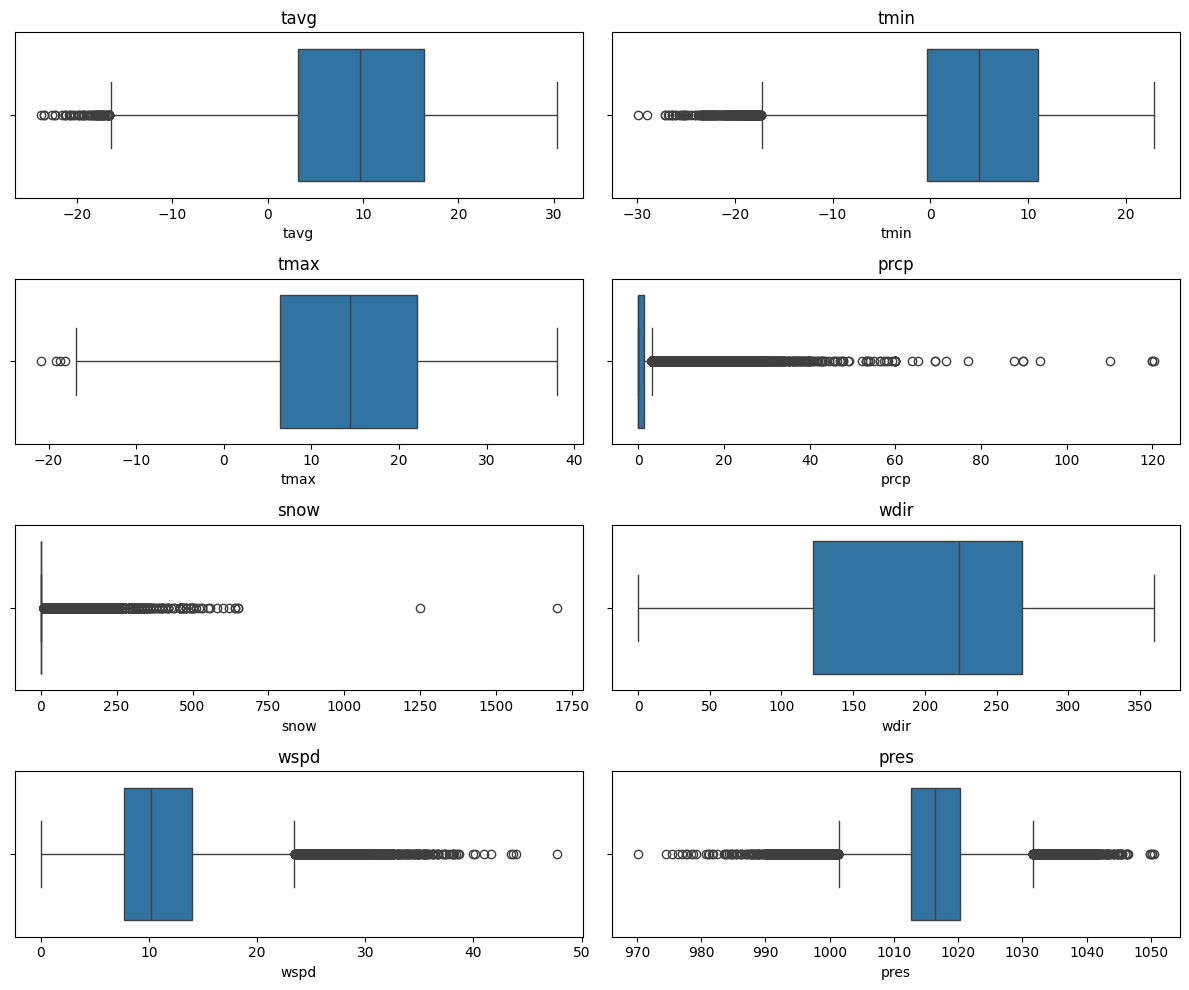

In [962]:
variables = ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']
plt.figure(figsize=(12, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=huge_df.dropna(subset=[var]), x=var)
    plt.title(var)

plt.tight_layout()
plt.savefig("../reports/figures/data/data_featues_boxplots.png")
plt.show()

#### Conclusions
Apart from snow depth, the values seem realistic and there is no need to modify them in any way. Regarding snow, a reasonable assumption is that a snow cover above 600mm is unrealistic.

In [963]:
MAX_SNOW_DEPTH = 800

for df, _ in dfs:
    df['snow'] = df['snow'].clip(upper=MAX_SNOW_DEPTH)

In [964]:
huge_df = pd.concat([df for df, _ in dfs])

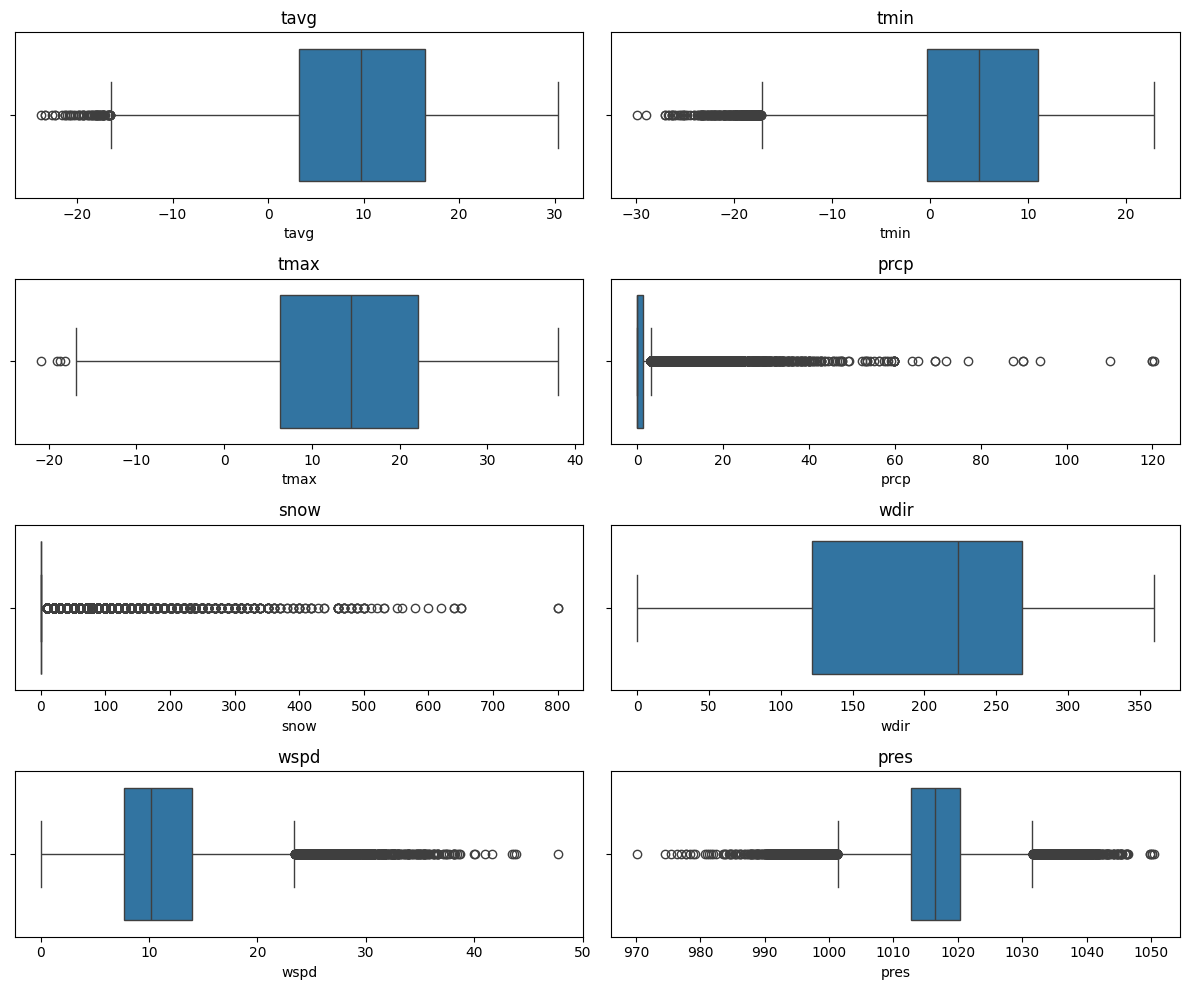

In [965]:
variables = ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']
plt.figure(figsize=(12, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=huge_df.dropna(subset=[var]), x=var)
    plt.title(var)

plt.tight_layout()
plt.savefig("../reports/figures/data/data_featues_boxplots_clipped_snow.png")
plt.show()

## Correlations

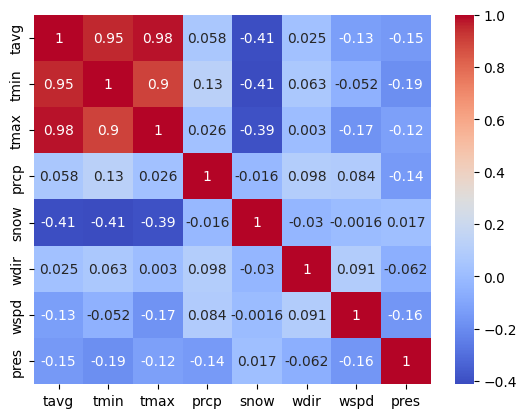

In [966]:
corr = huge_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.savefig("../reports/figures/data/correlation.png")
plt.show()